# Prezentacja pracy zaliczeniowej na przedmiot "Praktyczny Machine Learning w Pythonie"
__Autor__: Hubert Wojewoda, Andrzej Żernaczuk, Piotr Radziszewski

__github__: 
### Contents: 
1. Data description
2. Data engineering 
3. Models and results
4. Results
5. Conclusions


# 1. Data description

### 1.1. Data Source

Dane: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/metadata?resource=download

### 1.2 Variables


__RainTomorrow__ is the target variable to predict. The amount of next day rain in mm. Used to create response variable RainTomorrow. It means: did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.


Zmienne objaśniające:


__Date__ - The date of observation

__Location__ - The common name of the location of the weather station 

__MinTemp__ - The minimum temperature in degrees celsius

__MaxTemp__ - The maximum temperature in degrees celsius

__Rainfall__ - The amount of rainfall recorded for the day in mm

__Evaporation__ - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

__Sunshine__ - The number of hours of bright sunshine in the day.

__WindGustDir__ - The direction of the strongest wind gust in the 24 hours to midnight

__WindGustSpeed__ - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

__WindDir9am__ - Direction of the wind at 9am

__WindDir3pm__ - Direction of the wind at 3pm

__WindSpeed9am__ - Wind speed (km/hr) averaged over 10 minutes prior to 9am

__WindSpeed3pm__ - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

__Humidity9am__ - Humidity (percent) at 9am

__Humidity3pm__ - Humidity (percent) at 3pm

__Pressure9am__ - Atmospheric pressure (hpa) reduced to mean sea level at 9am

__Pressure3pm__ - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

__Cloud9am__ - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many

__Cloud3pm__ - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

__Temp9am__ - Temperature (degrees C) at 9am

__Temp3pm__ - Temperature (degrees C) at 3pm

__RainToday__ - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0


### 1.3 Data exploration

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
raw_data = pd.read_csv("weatherAUS.csv")
features = raw_data.columns.tolist()
features.remove('RainTomorrow')
sns.countplot(x=raw_data['RainTomorrow'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Porównanie liczebności klas')
plt.show()

In [ ]:
for col in features:
    try:
        raw_data[col].plot.hist(bins=10)
        plt.title(col)
    except TypeError:
        plt.barh(raw_data[col].value_counts().index, raw_data[col].value_counts().values)
    plt.show()

# 2 Data engineering
1. Raw data was taken from kaggle (saved as __weatherAUS.csv__) and then passed to data frame
2. One Hot Encoding of Location and Winds columns
3. Grouping months into year seasons 
4. Cities names changed to geographic coordinates (?)

In [34]:
import pickle
with open('mutual_info.pkl', 'rb') as f:
    mutual_info = pickle.load(f)
with open('spearman.pkl', 'rb') as f:
    spearman = pickle.load(f)
with open('xgb_info.pkl', 'rb') as f:
    xgb_info = pickle.load(f)

In [ ]:
mutual_info

In [ ]:
spearman

In [ ]:
xgb_info

In [ ]:
#regresja!!!!!

# 3. Modele
Każdy model był sprawdzany StratifiedKfold
### 3.1 Regresja liniowa
- Model bazowy
- Bardzo szybki
- Brak tuningu hiper-parametrów
- Zaskakująco wysoki ROC_AUC:
    0.840 na zbiorze testowym
    
### 3.2 KNN 
- Użyte zostały wyskalowane dane (zarówno standard jak i minmax)
- Bardzo wolny
- Tuning hiper-parametrów (random_search):  
    1. n_neighbours  
    2. p  
- Bardzo słabe wyniki przy random_search:
    ROC_AUC w okolicach 0.76
    
### 3.3 SVM
- Użyte zostały wyskalowane dane (zarówno standard jak i minmax)
- Bardzo wolny
- Jedynie przy braniu samplowych 10000 wierszy jakkolwiek działał
- Zbyt wolny na tuning hiper-parametrów
- Bazowo bardzo słaby wynik:
    ROC_AUC w okolicach 0.77
 
### 3.4 Lasy losowe
- Zauważalnie szybszy algorytm
- Użyte zostały dane poddane Label Encodingowi
- Tuning hiper-parametrów (random_search):
    1. n_estimators
    2. max_depth
    3. max_features
    4. min_samples_split
- Wyniki lepsze od KNN i SVM, jednak dalej zauważalnie gorsze od Regresji Liniowej 
    ROC_AUC = 0.781
    
### 3.5 XGBoost 
- Podobna prędkość jak Lasy Losowe (możliwy random_search)
- Użyte zostały dane poddane Label Encodingowi
- Tuning hiper-parametrów (random_search):
    1. max_depth
    2. subsample
    3. colsample_bytree
    4. reg_lambda
    5. gamma (zamiennie z reg_lambda)
- Najlepszy wynik:
    ROC_AUC = 80
    
### 3.6 Głębokie sieci neuronowe
- Bezdyskusyjnie najskuteczniejsz model 
- Zostały użyte wyskalowane dane (standard)
- Bardzo dokładny tuning hiper-parametrów (random_search): 
    1. Optimizer (Adam, SGD)
    2. Batch Size 
    3. Dropout 
    4. Regularyzacja L2
- Do tego zostały sprawdzone różne konfiguracje liczby warstw, neuronów oraz funkcje aktywacji. Algorytm działał w następujący sposób: 
    1. Losował funkcje aktywacji oraz liczbe warstw
    2. Dla każdej warstwy losował liczbę neuronów
- Funkcja stary jaka zostala użyta to BinaryCrossEntropy 
- Funkcją aktywacji ostatniego neurona jest sigmoid 
- W najlepszej konfiguracji udało się uzyskać wynik:  
 __ROC_AUC = 0.912 na zbiorze testowym__ 
 
 # 4. Results

In [43]:
results = {
    'Regresja liniowa': 0.84,
    'KNN': 0.76,
    'SVM': 0.77, 
    'Lasy losowe': 0.781,
    'XGBoost': 0.8,
    'Sieci neuronowe': 0.912
}
results_df = pd.DataFrame(data=results, index=[0])
results_df.columns.tolist()


['Regresja liniowa', 'KNN', 'SVM', 'Lasy losowe', 'XGBoost', 'Sieci neuronowe']

In [47]:
results_df.values.tolist()[0]

[0.84, 0.76, 0.77, 0.781, 0.8, 0.912]

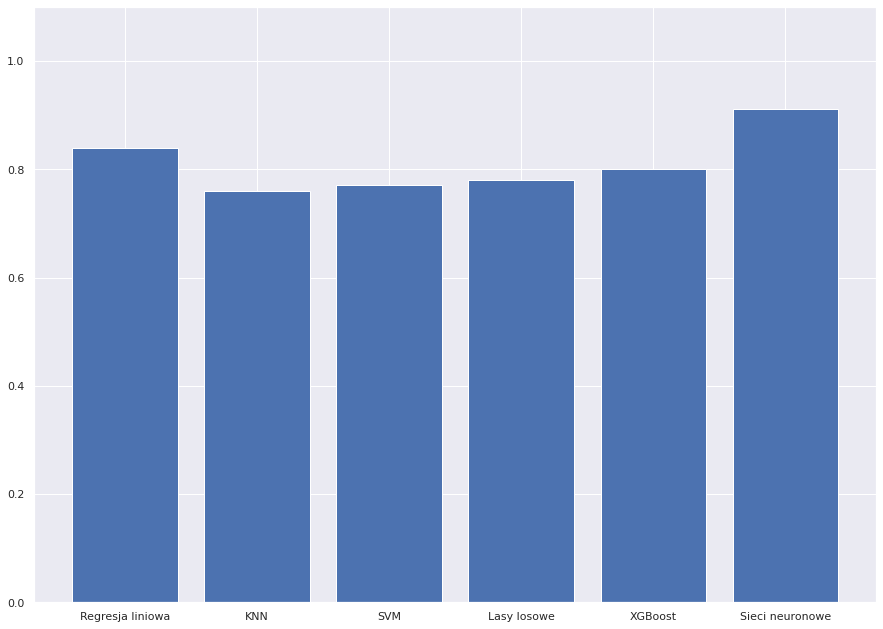

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim([0, 1.1])
ax.bar(results_df.columns.tolist(), results_df.values.tolist()[0])
plt.show()

# 5. Conclusions
- Bardzo ciekawe  wyniki
- Zaskakująco dobry wynik regresji liniowej
- Dataset nie nadający się do KNN ani SVM, obliczenia trwają zbyt długo na tuning hiper-parametrów oraz feature engineering
- Zaskakująco słaby wynik Lasów losowych oraz XGBoost
- Zdecydowanie najlepszy wynik głębokich sieci neuronowych 
- Możliwe powód:   
  Silne zależności liniowe